In [1]:
import sys
!{sys.executable} -m pip install matplotlib

In [3]:
!pip install kmapper

     -------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [168]:
import numpy as np 
import kmapper as km
import sklearn
import pandas as pd
import matplotlib as plt
import networkx

In [169]:
import os
os.listdir('/Users/eliza/OneDrive/Documents/WADEPS/clustering comparison')

['k-means']

In [173]:
#Import data as a matrix 
!pip install pandas
import pandas as pd
data_path = '/Users/eliza/OneDrive/Documents/WADEPS/clustering comparison/data_UofF.xlsx'
data=pd.read_excel(data_path)
data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/eliza/OneDrive/Documents/WADEPS/clustering comparison/data_UofF.xlsx'

In [18]:
#Remove rows with NA responses in data matrix
data_cleaned=data.dropna()
data_cleaned

,TtoF,UofF,lof1,lof2,lof3,lof4,suspect_race,suspect_gender,suspect_agression_level
0,49.0,2.0,1,1,0,0,2.0,1.0,2.0
1,72.0,1.0,0,0,0,1,7.0,1.0,2.0
2,196.0,5.0,4,0,1,0,1.0,1.0,1.0
3,158.0,8.0,6,0,2,0,1.0,1.0,3.0
4,56.0,4.0,3,1,0,0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
283,821.0,0.0,0,0,0,0,7.0,1.0,1.0
284,738.0,0.0,0,0,0,0,1.0,2.0,1.0
285,1831.0,0.0,0,0,0,0,2.0,1.0,1.0
286,853.0,0.0,0,0,0,0,2.0,1.0,1.0


In [165]:
#normalize columns
# Normalizing
normalized_data = (centered_data) / data_cleaned.std()

data_cleaned=normalized_data

data_cleaned.head()

,TtoF,UofF,lof1,lof2,lof3,lof4,suspect_race,suspect_gender,suspect_agression_level
0,-1.162116,0.572751,0.283927,1.451948,-0.219094,-0.212295,0.087177,-0.60839,1.256841
1,-1.121658,0.066762,-0.409047,-0.283160,-0.219094,3.184422,2.876847,-0.60839,1.256841
2,-0.903537,2.090717,2.362846,-0.283160,3.987516,-0.212295,-0.470757,-0.60839,-0.571291
3,-0.970381,3.608683,3.748793,-0.283160,8.194126,-0.212295,-0.470757,-0.60839,3.084973
4,-1.149803,1.584729,1.669873,1.451948,-0.219094,-0.212295,0.087177,-0.60839,3.084973


In [166]:
#define filter variable
TtoF=data_cleaned.iloc[:,0] 
#converts filter to column vec
TtoF=TtoF.values.reshape(-1, 1)
TtoF

array([[-1.16211632e+00],
       [-1.12165834e+00],
       [-9.03537072e-01],
       [-9.70380688e-01],
       [-1.14980302e+00],
       [-1.15508015e+00],
       [-1.22016472e+00],
       [-1.23599611e+00],
       [-1.24303228e+00],
       [-9.03537072e-01],
       [-1.20257430e+00],
       [-9.43995050e-01],
       [-1.04953760e+00],
       [-1.20785143e+00],
       [-1.24830940e+00],
       [-1.18498387e+00],
       [-7.89199309e-01],
       [-9.24645582e-01],
       [ 1.09121714e+00],
       [-1.24830940e+00],
       [-5.51728570e-01],
       [-1.52425920e-01],
       [-6.83656758e-01],
       [-1.19202004e+00],
       [-1.07768228e+00],
       [-1.17618866e+00],
       [-1.22368281e+00],
       [-4.23318467e-01],
       [-1.21312855e+00],
       [-1.04426047e+00],
       [-4.12764211e-01],
       [-1.18322483e+00],
       [-1.02667005e+00],
       [-9.80934943e-01],
       [-9.98525368e-01],
       [ 4.63458839e-02],
       [-7.01247183e-01],
       [-1.23951419e+00],
       [-1.2

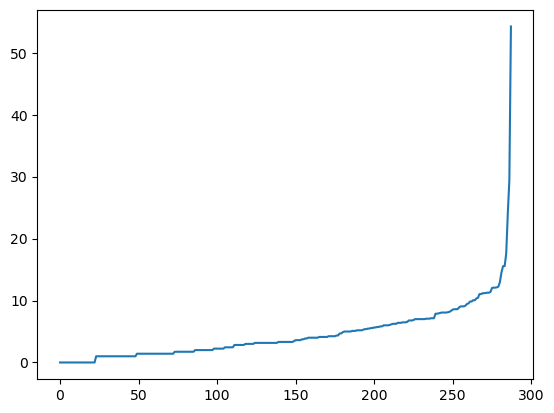

In [26]:
#Select epsilon value for DBScan clustering algorithm

#imports
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

#calculate avg distance between each pt in data set and its nearest neightbors
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(data_cleaned)
distances, indices = neighbors_fit.kneighbors(data_cleaned)

#sort distances by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

KeplerMapper(verbose=2)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (288, 9)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (288, 9) using lens shaped (288, 1)

Minimal points in hypercube before clustering: 6
Creating 14 hypercubes.
   > Found 1 clusters in hypercube 0.
   > Found 1 clusters in hypercube 1.
   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
No duplicate nodes found to remove.


Created 81 edges and 14 nodes in 0:00:00.046519.
Wrote 

C:\Users\eliza\AppData\Local\Temp\ipykernel_11780\3323210511.py:30: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


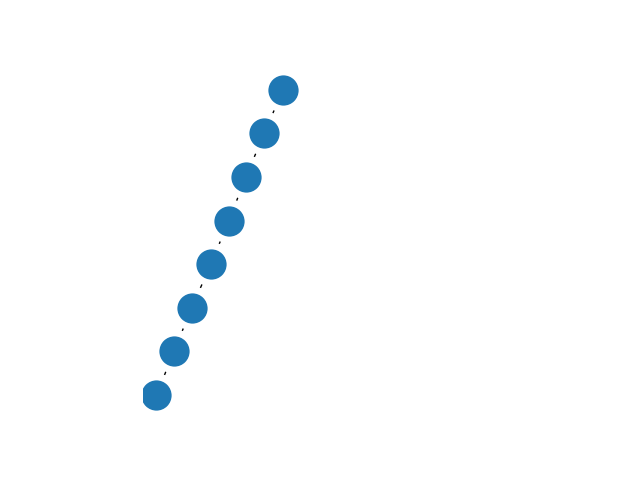

In [164]:
%matplotlib inline
%matplotlib notebook

#Initialize
mapper=km.KeplerMapper(verbose=2)
    
#Fit to and transform the data
projected_data = mapper.fit_transform(data_cleaned.values, projection=[0]) 

#Create a dictionary called 'graph' with nodes, edges
graph = mapper.map(
    projected_data,
    data_cleaned,
    cover=km.Cover(n_cubes=14, perc_overlap=.9),
    clusterer=sklearn.cluster.DBSCAN(eps=125, min_samples=6),
    remove_duplicate_nodes=True
)

#Visualize it
mapper.visualize(
    graph,
    path_html="TtoFMapper.html",
    color_values=TtoF,
    node_color_function=["mean"],
    color_function_name=["Time to Force"],
)

km.draw_matplotlib(graph)
#plt.savefig("TtoF_Mapper.png")  # Save the figure as an image file
plt.show()
Image(filename="TtoF_mapper.png") 

In [ ]:
#two sample t test for means
#null: sample 1 mean (no UofF) equals sample 2 mean (UofF) 
#if p-value is less than 0.05, then we can reject null (assume means)
    #are not equal 

In [3]:
#Samples

sample1=np.array([0.014,1387.31,0.7767,0.1837,0.0396,0.2233,0.6837,0.3163,0.8605,0.1302,0.0093,0.0047,0,0,0.0093])
sample2=np.array([2.205,69.18,0.7273,0.0909,0.1818,0.2727,0.8182,0.1818,0.1591,0.8409,0,0.3636,0.2626,0.0909,0])

#find variance for each group
print(np.var(sample1), np.var(sample2))


119714.68897092383 294.2844039504891


In [4]:
#Divide larger var by smaller var
119714.68897092383/294.2844039504891

406.7992981070952

In [7]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=sample1, b=sample2, equal_var=True)

Ttest_indResult(statistic=0.9470071125705692, pvalue=0.3517370063228683)